In [2]:
from MAT311.load import load_data
target = "Churn"
# X_train, X_test, y_train, y_test, X_submission, submission_ID  = load_data(target)

# X_submission.isna().sum().sort_values()
# import pandas as pd



# churn_train = pd.read_csv("../data/raw/train.csv")
# churn_test = pd.read_csv("../data/raw/test.csv")

# churn_test.isna().sum().sort_values()

In [3]:
# y_train.head()

# Distribution of Churn

In [4]:
import seaborn as sns 
churn_count = 0
no_churn_count = 0
# sns.countplot(x = y_train)


# proportions = y_train.value_counts(normalize = True)

# print(proportions)

In [5]:
import pandas as pd 
submission_5 = pd.read_csv("../data/raw/submission5.csv")

submission_5.describe()

,CustomerID,churn_probability
count,133776.000000,133776.000000
mean,253147.694273,0.016520
std,145702.951964,0.058944
min,0.000000,0.000000
25%,127106.750000,0.000000
50%,253324.500000,0.000000
75%,379358.500000,0.000000
max,505204.000000,0.393939


In [6]:
churn_train = pd.read_csv("../data/raw/train.csv")



## Train EDA

In [7]:
churn_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,NaN,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,NaN,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,NaN,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,NaN,26,1,5.0,Basic,Quarterly,679.45,NaN,active,06-29,07-04,0


In [8]:
churn_train.isna().sum().sort_values()

CustomerID               0
Age                      0
Gender                   0
Usage Frequency          0
Subscription Type        0
Contract Length          0
Total Spend              0
Customer Status          0
Last Due Date            0
Last Payment Date        0
Churn                    0
Tenure               62021
Support Calls        62420
Last Interaction     62550
Payment Delay        88324
dtype: int64

Columns, "Tenure", "Support Calls", "Last Interaction", and "Payment Delay" all have missing values

<Axes: >

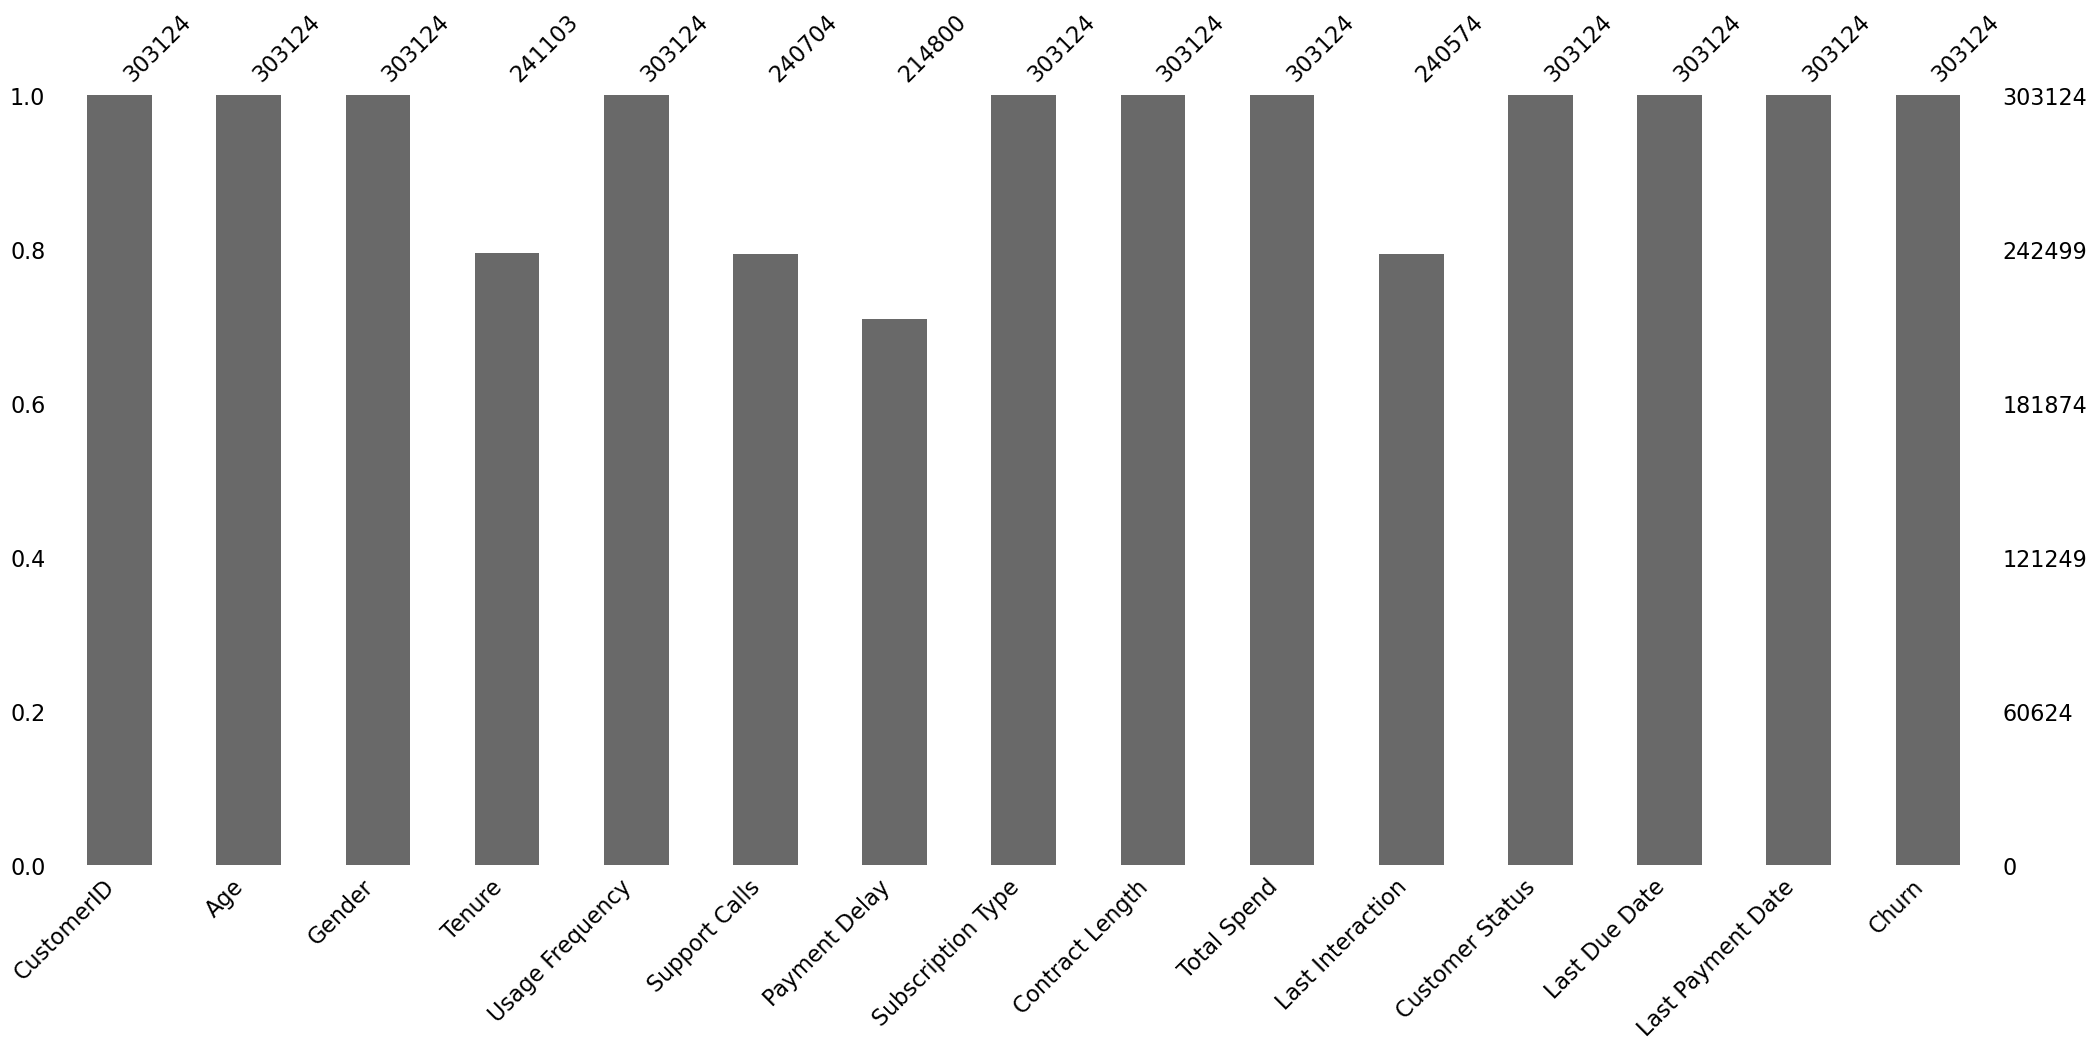

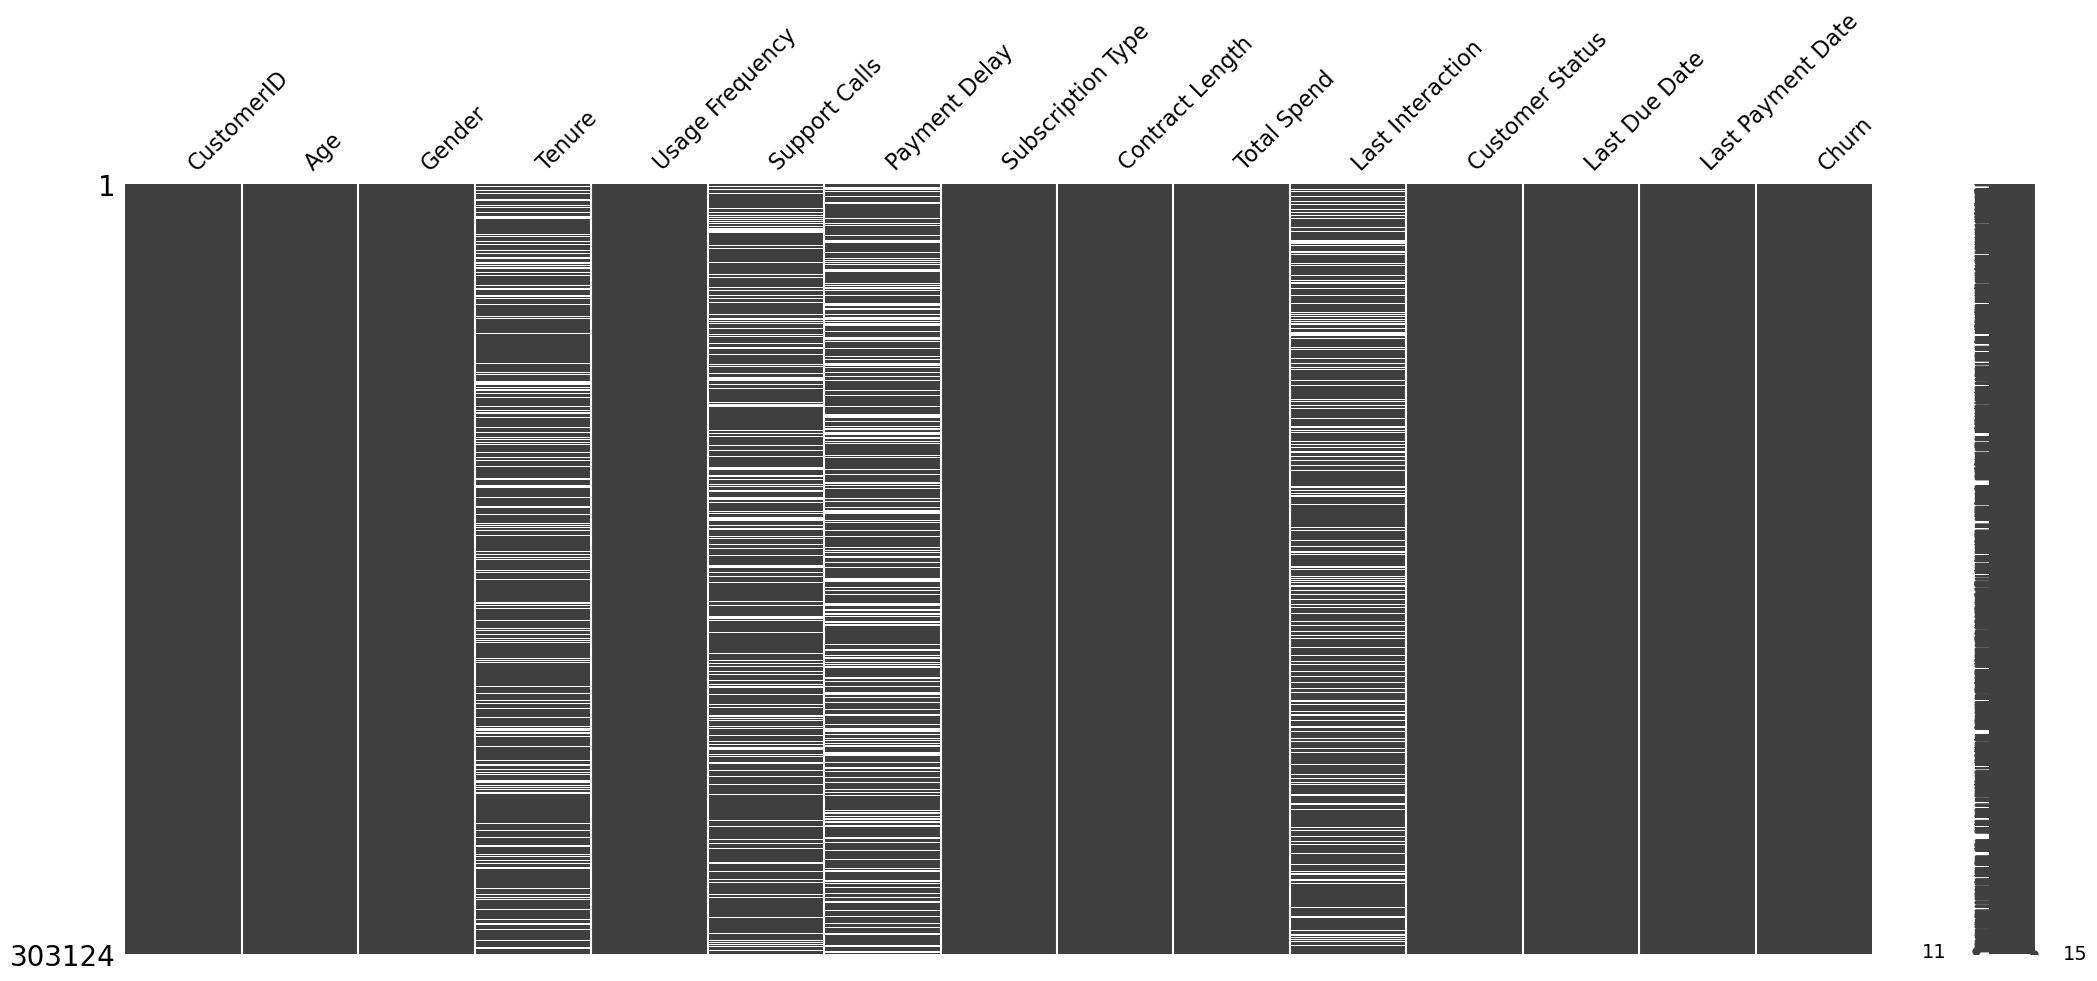

In [9]:
import missingno as msno

msno.bar(churn_train)       
msno.matrix(churn_train)     

## How do the differnt cols relate to churn?

### Age

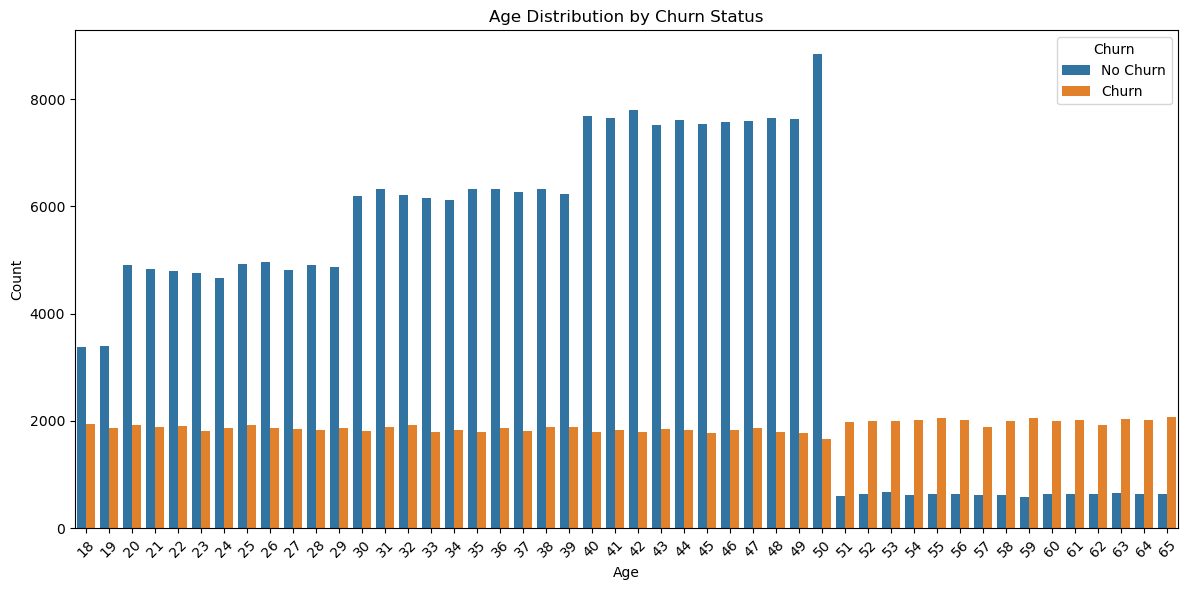

In [10]:
import matplotlib.pyplot as plt

# Sort by age and plot
plt.figure(figsize=(12, 6))
sns.countplot(data=churn_train, x='Age', hue='Churn', order=sorted(churn_train['Age'].unique()))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender

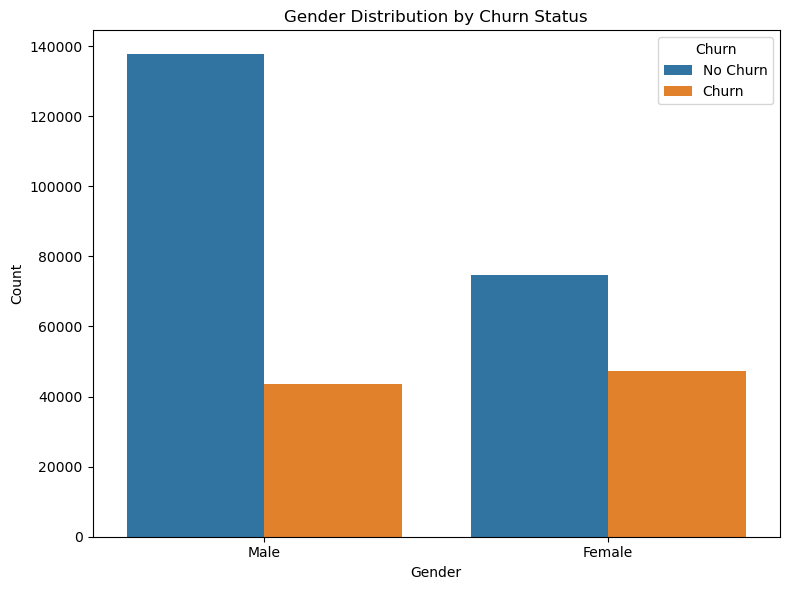

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=churn_train, x='Gender', hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

### Usage Frequency

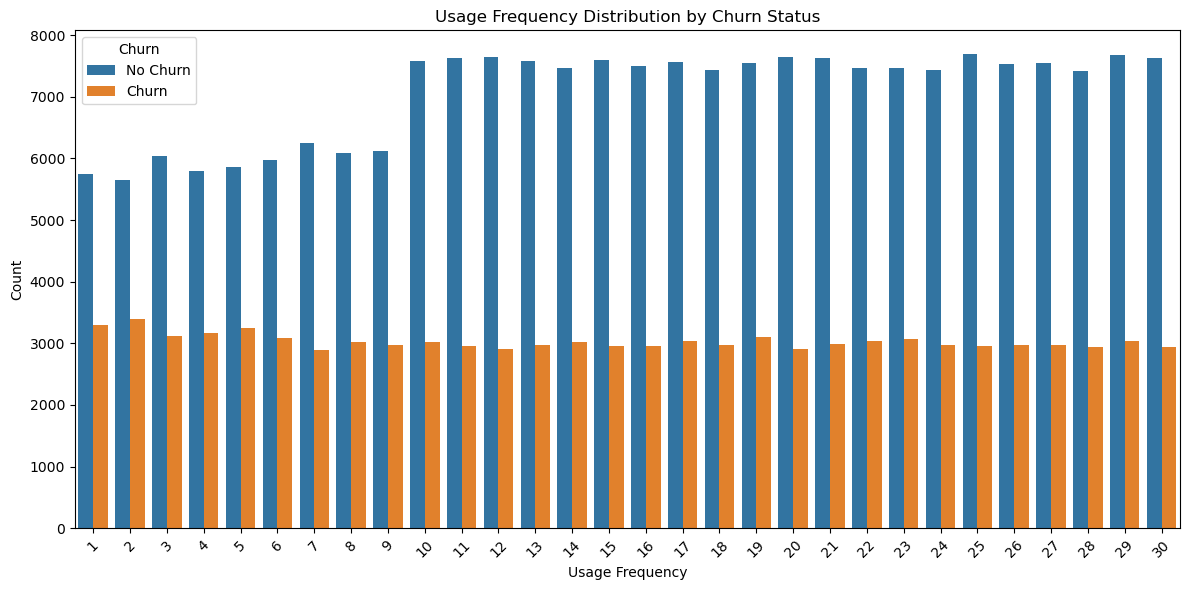

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=churn_train, x='Usage Frequency', hue='Churn', order=sorted(churn_train['Usage Frequency'].unique()))
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.title('Usage Frequency Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Subscription Type

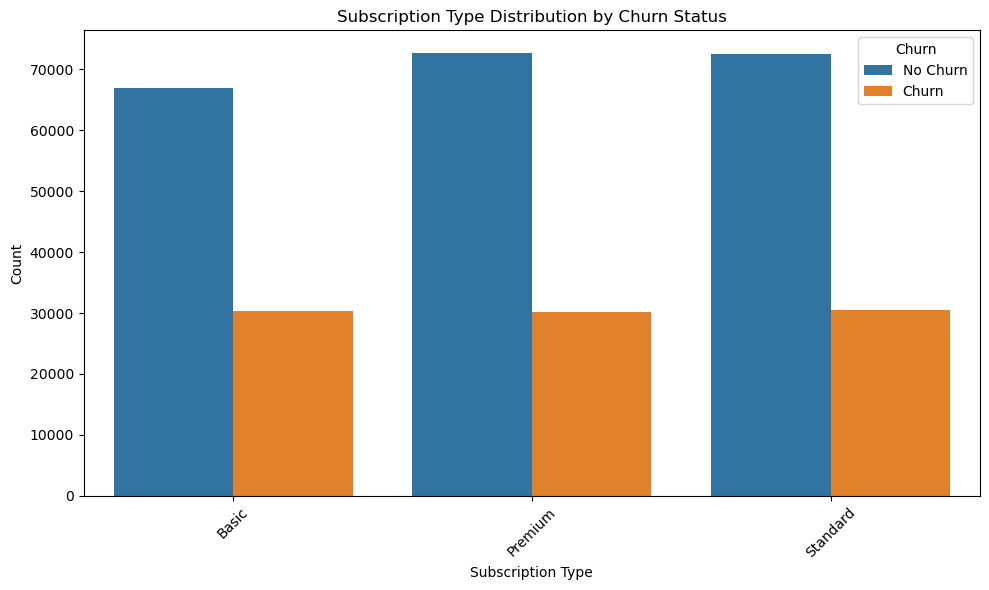

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_train, x='Subscription Type', hue='Churn')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title('Subscription Type Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Contract Length

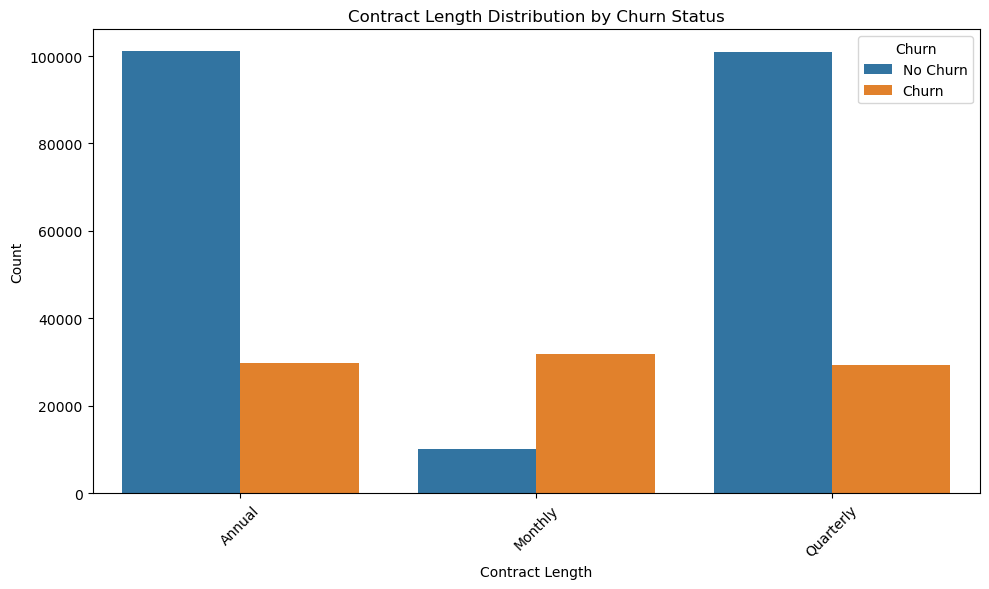

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_train, x='Contract Length', hue='Churn', order=sorted(churn_train['Contract Length'].unique()))
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title('Contract Length Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Spend

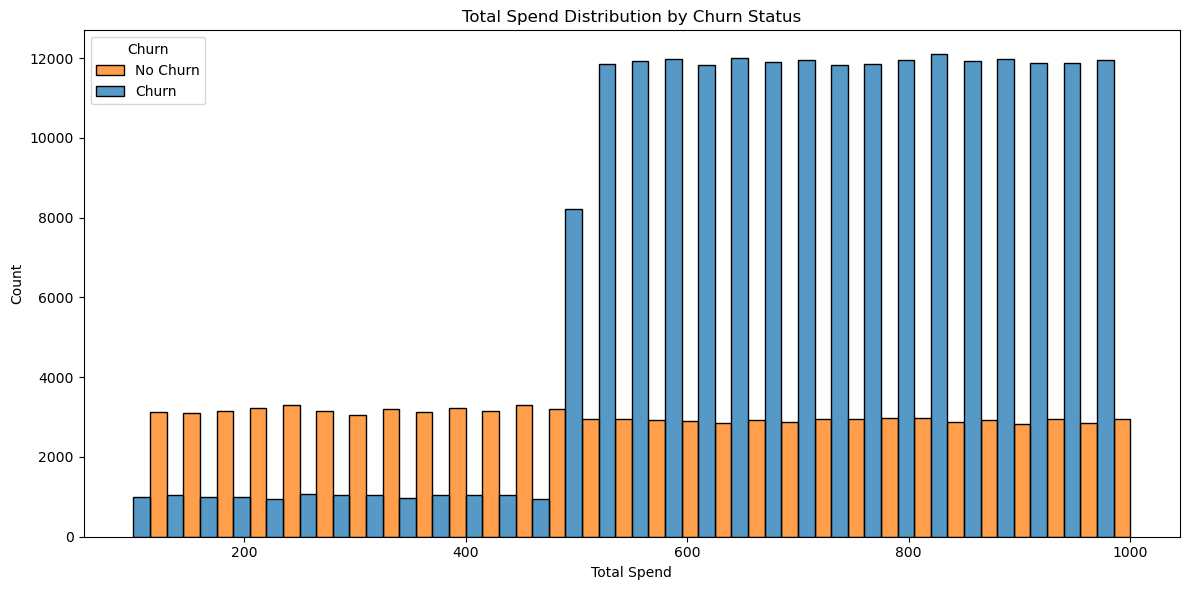

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_train, x='Total Spend', hue='Churn', multiple='dodge', bins=30)
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.title('Total Spend Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

### Customer Status

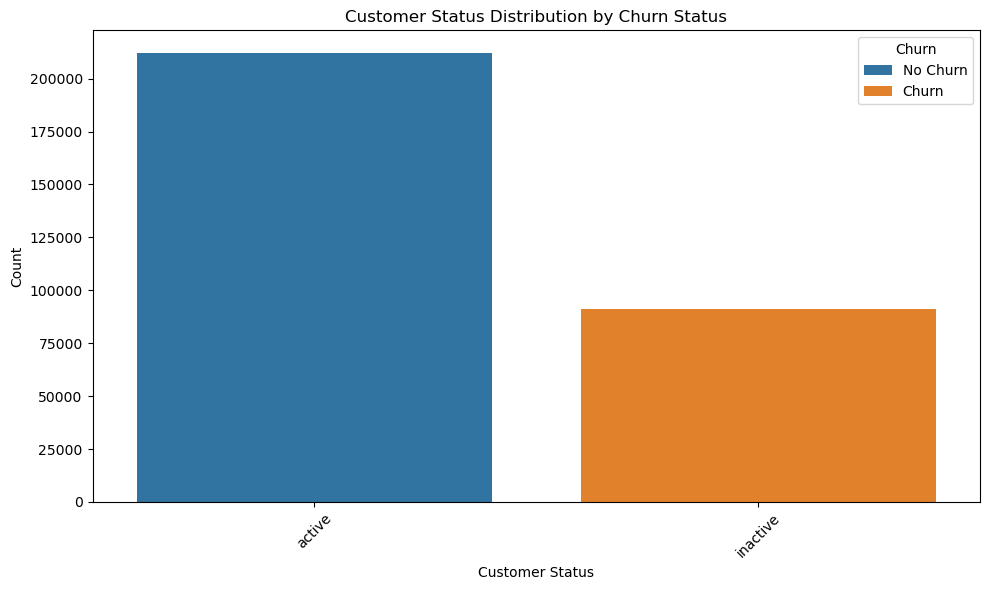

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_train, x='Customer Status', hue='Churn')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Customer Status Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print(churn_train[['Customer Status', 'Churn']].value_counts(normalize= True))


Customer Status  Churn
active           0        0.700001
inactive         1        0.299999
Name: proportion, dtype: float64


### Last Payment Date

0     07-08
1     06-25
2     07-21
3     07-14
4     07-04
5     06-26
6     07-02
7     07-11
8     06-07
9     06-09
10    06-25
11    06-27
12    06-18
13    06-22
14    06-24
15    07-13
16    06-26
17    06-24
18    07-04
19    07-03
Name: Last Payment Date, dtype: object


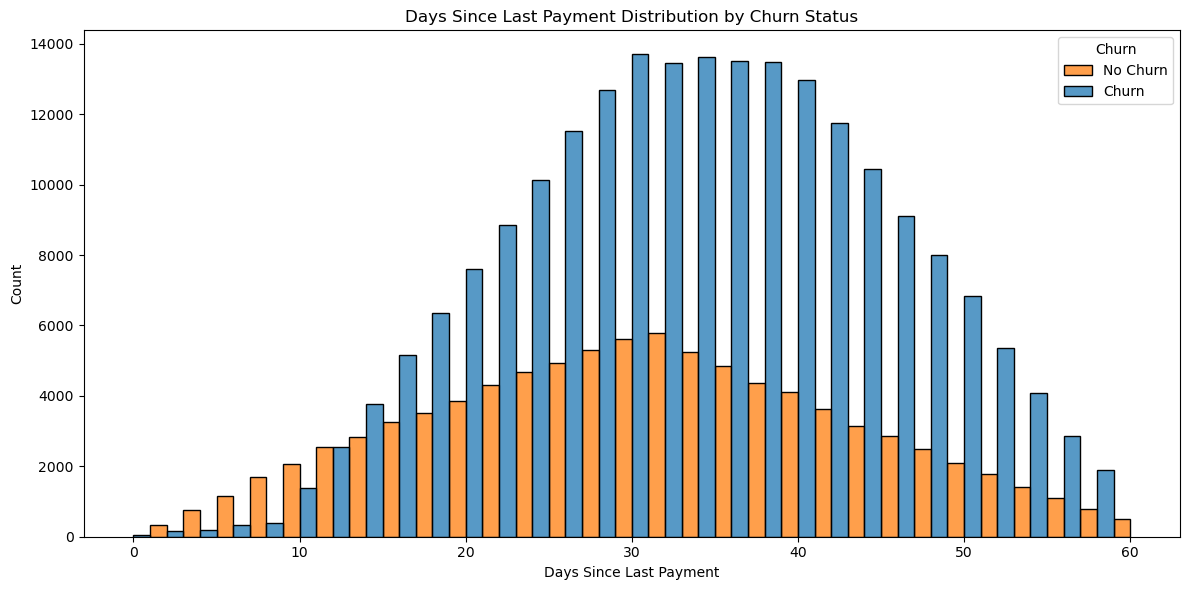

In [18]:
# Check the raw date format
print(churn_train['Last Payment Date'].head(20))

# Add year to the dates (assume 2024 or the current year)
churn_train['Last Payment Date'] = pd.to_datetime('2024-' + churn_train['Last Payment Date'].astype(str), 
                                                    format='%Y-%m-%d', 
                                                    errors='coerce')

# Calculate days since last payment (using max date as reference)
reference_date = churn_train['Last Payment Date'].max()
churn_train['Days_Since_Payment'] = (reference_date - churn_train['Last Payment Date']).dt.days

# Now plot
plt.figure(figsize=(12, 6))
plot_data = churn_train.dropna(subset=['Days_Since_Payment', 'Churn']).copy()
plot_data['Churn'] = plot_data['Churn'].astype(int)

sns.histplot(data=plot_data, 
             x='Days_Since_Payment', 
             hue='Churn', 
             multiple='dodge', 
             bins=30)
plt.xlabel('Days Since Last Payment')
plt.ylabel('Count')
plt.title('Days Since Last Payment Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

### Last due date

0     06-21
1     06-10
2     06-27
3     06-30
4     06-29
5     06-09
6     06-10
7     06-24
8     06-02
9     06-03
10    06-13
11    06-26
12    06-18
13    06-16
14    06-09
15    06-28
16    06-22
17    06-13
18    06-25
19    06-17
Name: Last Due Date, dtype: object


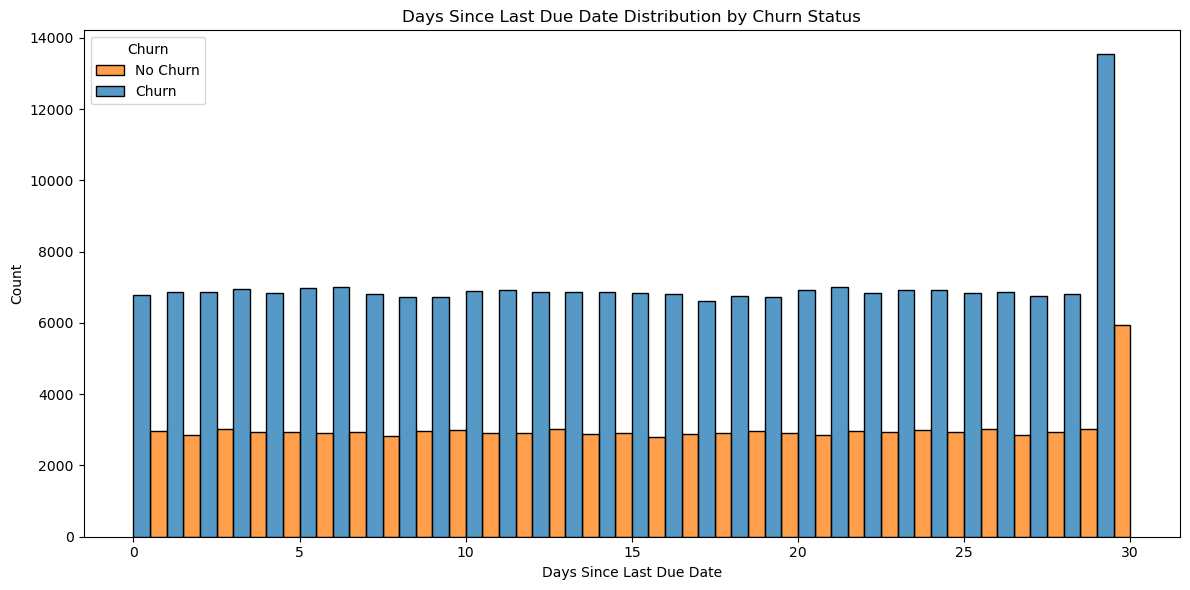

In [19]:
# Check the raw date format
print(churn_train['Last Due Date'].head(20))

# Add year to the dates (assume 2024 or the current year)
churn_train['Last Due Date'] = pd.to_datetime('2024-' + churn_train['Last Due Date'].astype(str), 
                                                format='%Y-%m-%d', 
                                                errors='coerce')

# Calculate days since last due date (using max date as reference)
reference_date = churn_train['Last Due Date'].max()
churn_train['Days_Since_Due'] = (reference_date - churn_train['Last Due Date']).dt.days

# Now plot
plt.figure(figsize=(12, 6))
plot_data = churn_train.dropna(subset=['Days_Since_Due', 'Churn']).copy()
plot_data['Churn'] = plot_data['Churn'].astype(int)

sns.histplot(data=plot_data, 
             x='Days_Since_Due', 
             hue='Churn', 
             multiple='dodge', 
             bins=30)
plt.xlabel('Days Since Last Due Date')
plt.ylabel('Count')
plt.title('Days Since Last Due Date Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

## Columns with Missing Values

Now let's explore the columns that have missing data: Tenure, Support Calls, Last Interaction, and Payment Delay

### Tenure

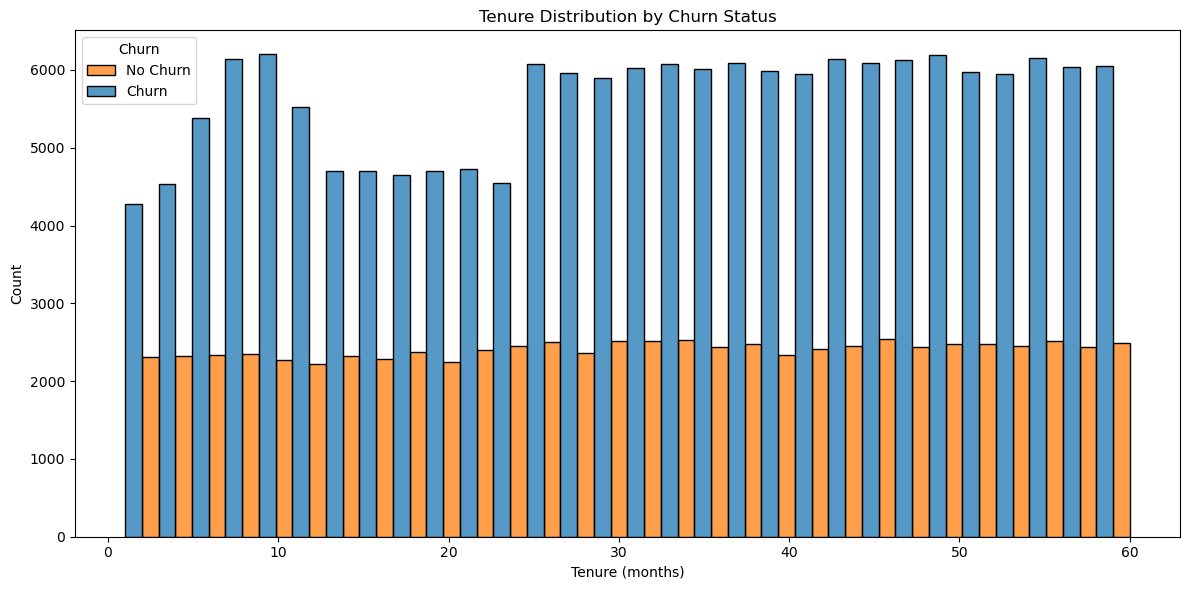

Missing values: 62021 (20.46%)


In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_train, x='Tenure', hue='Churn', multiple='dodge', bins=30)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Tenure Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# Check missing value proportion
print(f"Missing values: {churn_train['Tenure'].isna().sum()} ({churn_train['Tenure'].isna().sum() / len(churn_train) * 100:.2f}%)")

### Support Calls

In [32]:
churn_train["Support Calls"] = churn_train["Support Calls"].dropna(inplace = True)
churn_train["Support Calls"] = churn_train["Support Calls"].astype(int)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

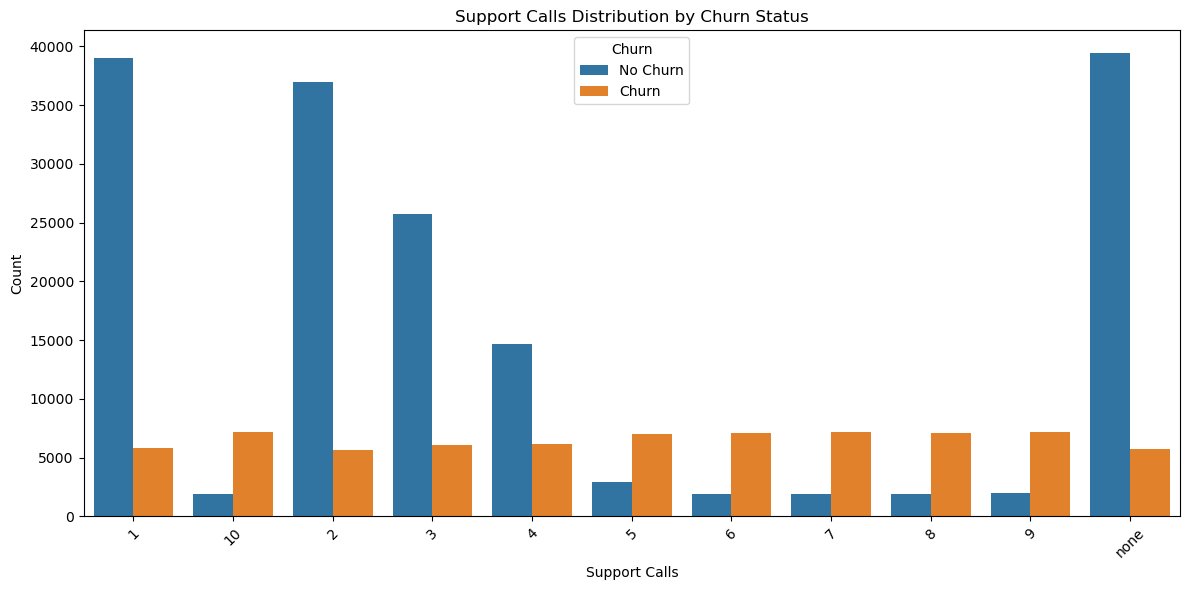

Missing values: 62420 (20.59%)


: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=churn_train, x='Support Calls', hue='Churn', order=sorted(churn_train['Support Calls'].dropna().unique()))
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title('Support Calls Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check missing value proportion
print(f"Missing values: {churn_train['Support Calls'].isna().sum()} ({churn_train['Support Calls'].isna().sum() / len(churn_train) * 100:.2f}%)")

### Last Interaction

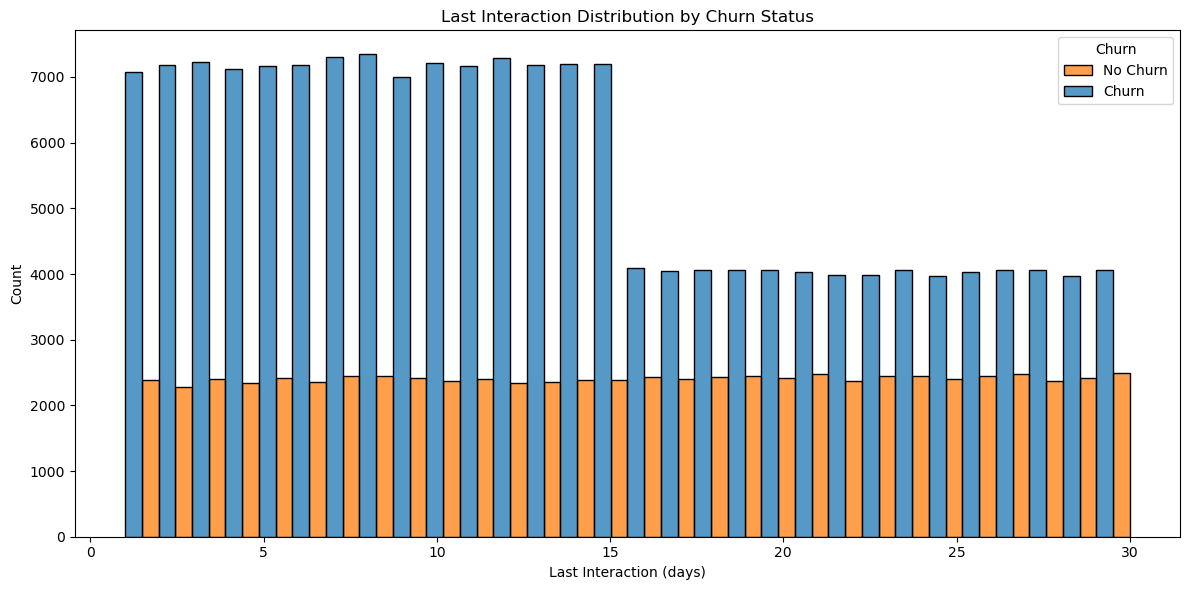

Missing values: 62550 (20.64%)


: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_train, x='Last Interaction', hue='Churn', multiple='dodge', bins=30)
plt.xlabel('Last Interaction (days)')
plt.ylabel('Count')
plt.title('Last Interaction Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# Check missing value proportion
print(f"Missing values: {churn_train['Last Interaction'].isna().sum()} ({churn_train['Last Interaction'].isna().sum() / len(churn_train) * 100:.2f}%)")

### Payment Delay

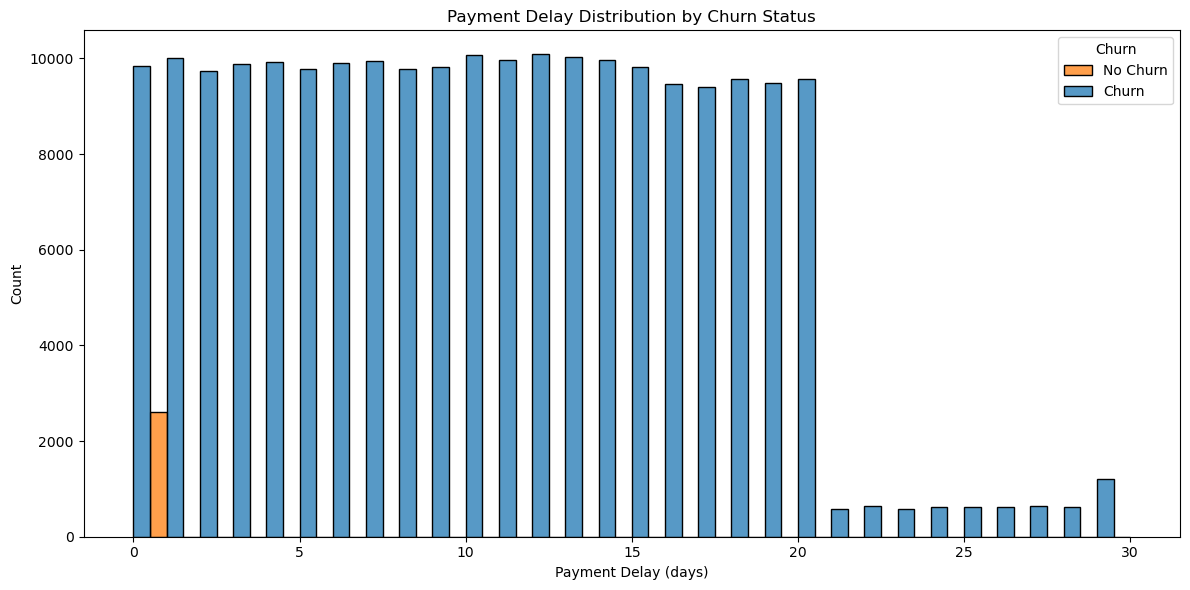

Missing values: 88324 (29.14%)


: 

: 

: 

: 

: 

: 

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_train, x='Payment Delay', hue='Churn', multiple='dodge', bins=30)
plt.xlabel('Payment Delay (days)')
plt.ylabel('Count')
plt.title('Payment Delay Distribution by Churn Status')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

# Check missing value proportion
print(f"Missing values: {churn_train['Payment Delay'].isna().sum()} ({churn_train['Payment Delay'].isna().sum() / len(churn_train) * 100:.2f}%)")

### Missingness Patterns

Let's check if missingness is related to churn status

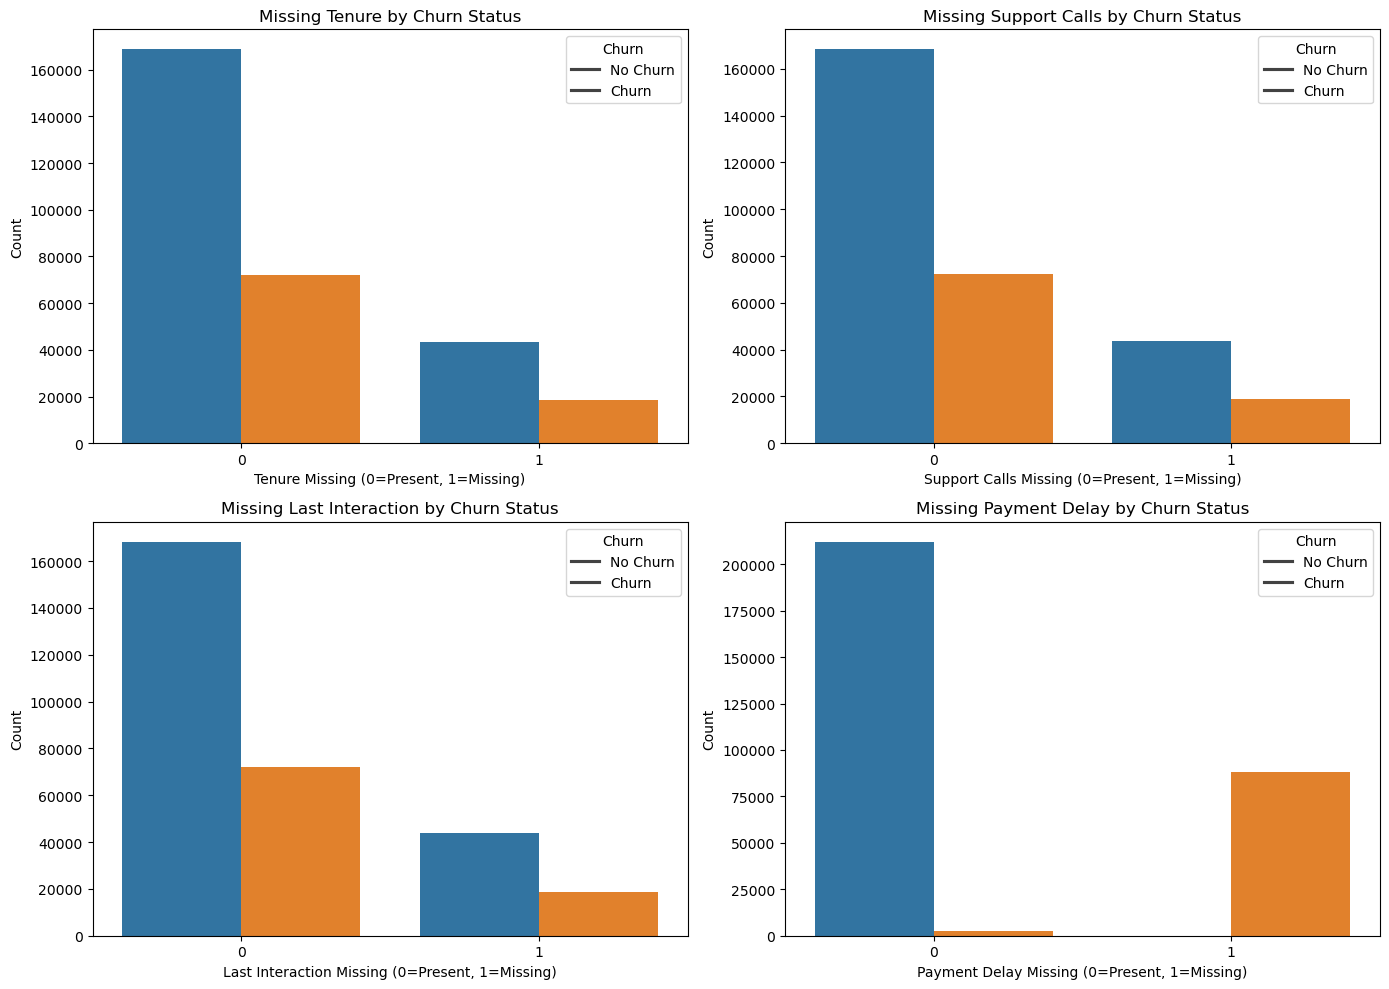


Missing value proportions by Churn status:

Tenure:
Tenure_Missing  Churn
0               0        0.557059
                1        0.238335
1               0        0.142942
                1        0.061665
Name: proportion, dtype: float64

Support Calls:
Support Calls_Missing  Churn
0                      0        0.555779
                       1        0.238299
1                      0        0.144222
                       1        0.061701
Name: proportion, dtype: float64

Last Interaction:
Last Interaction_Missing  Churn
0                         0        0.555443
                          1        0.238206
1                         0        0.144558
                          1        0.061793
Name: proportion, dtype: float64

Payment Delay:
Payment Delay_Missing  Churn
0                      0        0.700001
                       1        0.008620
1                      1        0.291379
Name: proportion, dtype: float64


: 

: 

: 

: 

: 

: 

In [ ]:
# Create binary flags for missing values
missing_cols = ['Tenure', 'Support Calls', 'Last Interaction', 'Payment Delay']

for col in missing_cols:
    churn_train[f'{col}_Missing'] = churn_train[col].isna().astype(int)

# Create a subplot for each missing column
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(missing_cols):
    ax = axes[idx]
    missing_col = f'{col}_Missing'
    
    # Count plot of missing vs not missing by churn
    data = churn_train[[missing_col, 'Churn']].value_counts().reset_index()
    data.columns = [missing_col, 'Churn', 'count']
    
    sns.barplot(data=data, x=missing_col, y='count', hue='Churn', ax=ax)
    ax.set_xlabel(f'{col} Missing (0=Present, 1=Missing)')
    ax.set_ylabel('Count')
    ax.set_title(f'Missing {col} by Churn Status')
    ax.legend(title='Churn', labels=['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

# Print proportions
print("\nMissing value proportions by Churn status:")
for col in missing_cols:
    print(f"\n{col}:")
    print(churn_train[[f'{col}_Missing', 'Churn']].value_counts(normalize=True).sort_index())

: 

: 

: 

: 

: 

: 